In [1]:
import os
import tensorflow as tf
import glob
import pathlib
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

from tensorflow.keras.layers import Dense,Conv2D,Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

from tensorflow.keras import layers, models

In [2]:
train="D:\\GitHub\\Bird-Classifier\\data\\train"
test="D:\\GitHub\\Bird-Classifier\\data\\test"
valid="D:\\GitHub\\Bird-Classifier\\data\\valid"

In [3]:
def process(data):
    path=pathlib.Path(data)#converting the string to path
    filepaths=list(path.glob(r"*/*.jpg"))#Going through all the subpaths 
    labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))#Separating the label from filepath and storing it
    df1=pd.Series(filepaths,name='filepaths').astype(str)
    df2=pd.Series(labels,name='labels')
    df=pd.concat([df1,df2],axis=1)#Making the dataframe
    return df

process(test)

,filepaths,labels
0,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
1,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
2,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
3,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
4,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
...,...,...
1620,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1621,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1622,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1623,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD


In [4]:
df_train=process(train)
df_test=process(test)
df_valid=process(valid)

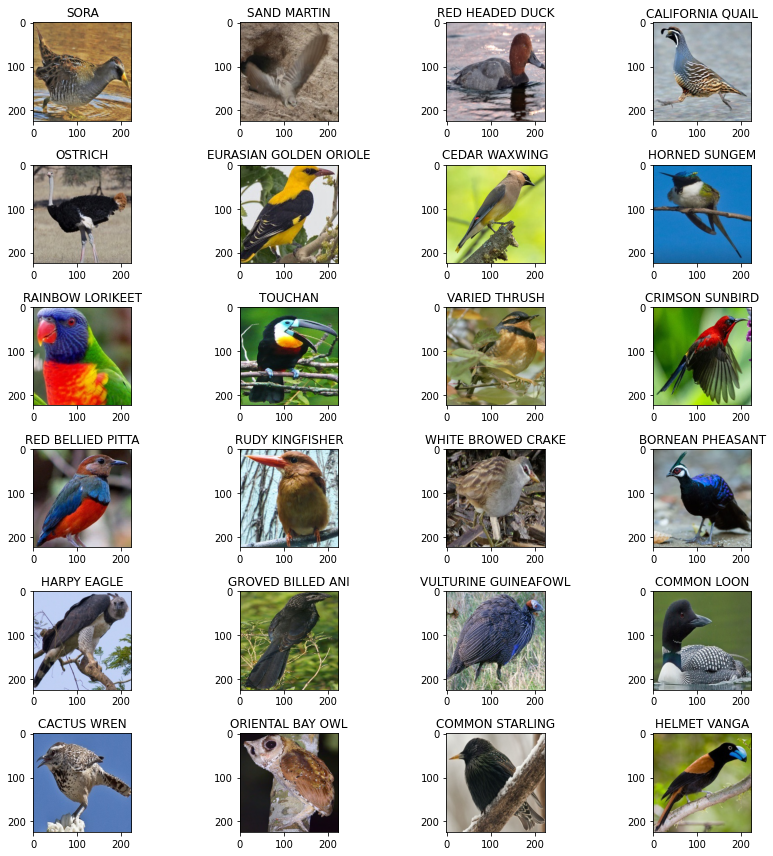

In [5]:
df_train=df_train.sample(frac=1).reset_index(drop=True)#Shuffling the dataframe so we can get random bird pictures
fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(12,12))

for i,ax in enumerate(axes.flat): 
    x=plt.imread(df_train['filepaths'][i])#reading the image
    ax.imshow(x)
    ax.set_title(df_train['labels'][i])
plt.tight_layout()    
plt.show() 

In [6]:
train_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
test_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
valid_generator=ImageDataGenerator( preprocessing_function=preprocess_input)

In [7]:
train_image=train_generator.flow_from_dataframe(dataframe=df_train,
                                                x_col='filepaths',
                                                y_col='labels',
                                                target_size=(224,224),
                                                batch_size=64,
                                                subset='training',
                                                random_seed=42)

test_image = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepaths',
    y_col='labels',
    target_size=(224,224),
    batch_size=8
)

valid_image = test_generator.flow_from_dataframe(
    dataframe=df_valid,
    x_col='filepaths',
    y_col='labels',
    subset='training',
    target_size=(224,224),
    batch_size=32)

Found 47332 validated image filenames belonging to 325 classes.
Found 1625 validated image filenames belonging to 325 classes.
Found 1625 validated image filenames belonging to 325 classes.


In [8]:
classes = train_image.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


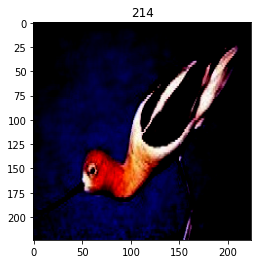

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


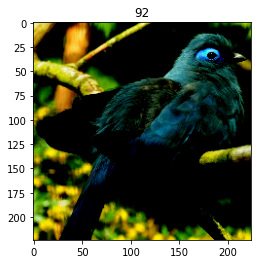

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


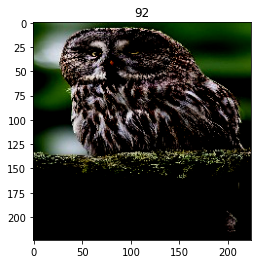

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


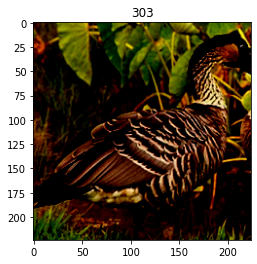

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


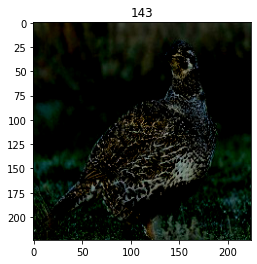

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


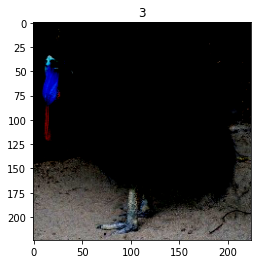

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


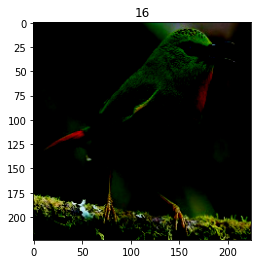

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


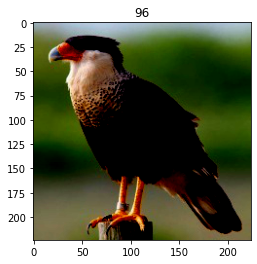

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


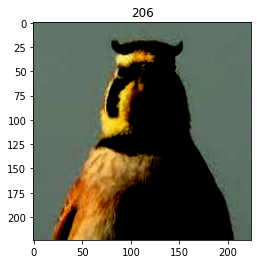

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


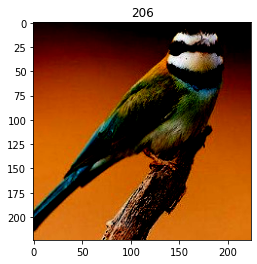

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


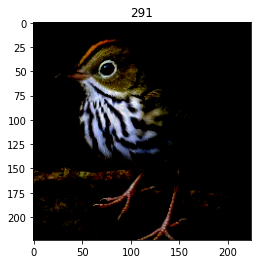

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


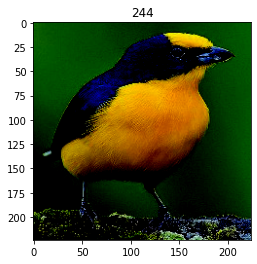

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


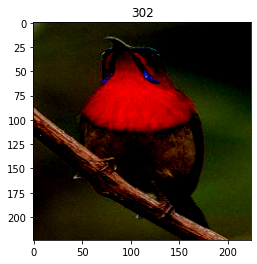

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


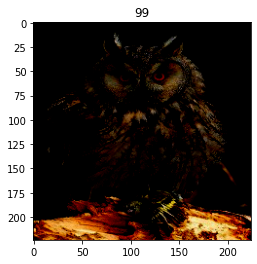

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


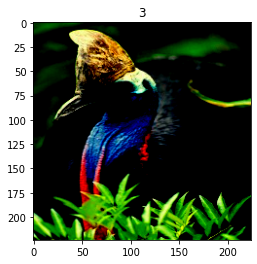

In [9]:
for i in range(15):
   img, label = train_image[i]
   label = np.argmax(label, axis=-1)
   print(img.shape) 
   plt.title(classes[label[1]])
   plt.imshow(img[1])
   plt.show()

In [10]:
'''vgg_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

print(vgg_model.output)

vgg_model.trainable = False
layer0 = tf.keras.layers.Flatten()(vgg_model.output)
layer1 = tf.keras.layers.Dense(4096, activation='relu')(layer0)
layer2 = tf.keras.layers.Dense(4096, activation='relu')(layer1)
out_layer = tf.keras.layers.Dense(325, activation='softmax')(layer2)
vgg_model = tf.keras.Model(vgg_model.input, out_layer)
vgg_model.summary()'''

small_guy = models.Sequential()

small_guy.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))

small_guy.add(layers.MaxPooling2D((2, 2)))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))


small_guy.add(layers.MaxPooling2D((2, 2)))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))

small_guy.add(layers.MaxPooling2D((2, 2)))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))


small_guy.add(layers.Flatten())
small_guy.add(layers.Dense(1024, activation = 'relu'))
small_guy.add(layers.Dense(512, activation = 'relu'))
small_guy.add(layers.Dense(325, activation = 'softmax'))

print(small_guy.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 51, 64)        3

In [11]:
from keras.metrics import Precision, Recall

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
small_guy.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()])
callbacks = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [12]:
from tensorflow.python.keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [13]:
with tf.device('/device:GPU:0'):

    history = small_guy.fit(
        train_image, 
        epochs=15,
        verbose=1,
        validation_data = valid_image,
        callbacks=callbacks, batch_size = 64)

Epoch 1/15
740/740 [==============================] - 299s 395ms/step - loss: 4.7515 - accuracy: 0.0956 - precision: 0.6406 - recall: 0.0154 - val_loss: 3.3233 - val_accuracy: 0.2849 - val_precision: 0.7041 - val_recall: 0.0849
Epoch 2/15
740/740 [==============================] - 166s 224ms/step - loss: 2.9789 - accuracy: 0.3508 - precision: 0.7770 - recall: 0.1596 - val_loss: 2.3307 - val_accuracy: 0.4622 - val_precision: 0.7837 - val_recall: 0.2898
Epoch 3/15
740/740 [==============================] - 180s 243ms/step - loss: 2.0310 - accuracy: 0.5314 - precision: 0.8361 - recall: 0.3651 - val_loss: 2.0043 - val_accuracy: 0.5231 - val_precision: 0.7761 - val_recall: 0.3711
Epoch 4/15
740/740 [==============================] - 189s 255ms/step - loss: 1.2647 - accuracy: 0.6901 - precision: 0.8806 - recall: 0.5717 - val_loss: 1.9249 - val_accuracy: 0.5692 - val_precision: 0.7368 - val_recall: 0.4825
Epoch 5/15
740/740 [==============================] - 192s 259ms/step - loss: 0.6188 - a

In [14]:
small_guy.save('D:\\GitHub\\Bird-Classifier\\models\\inception', save_format='h5')

In [15]:
del vgg_model

ret_model = tf.keras.models.load_model('D:\\GitHub\\Bird-Classifier\\models\\inception')

NameError: name 'vgg_model' is not defined

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK', 'BO

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


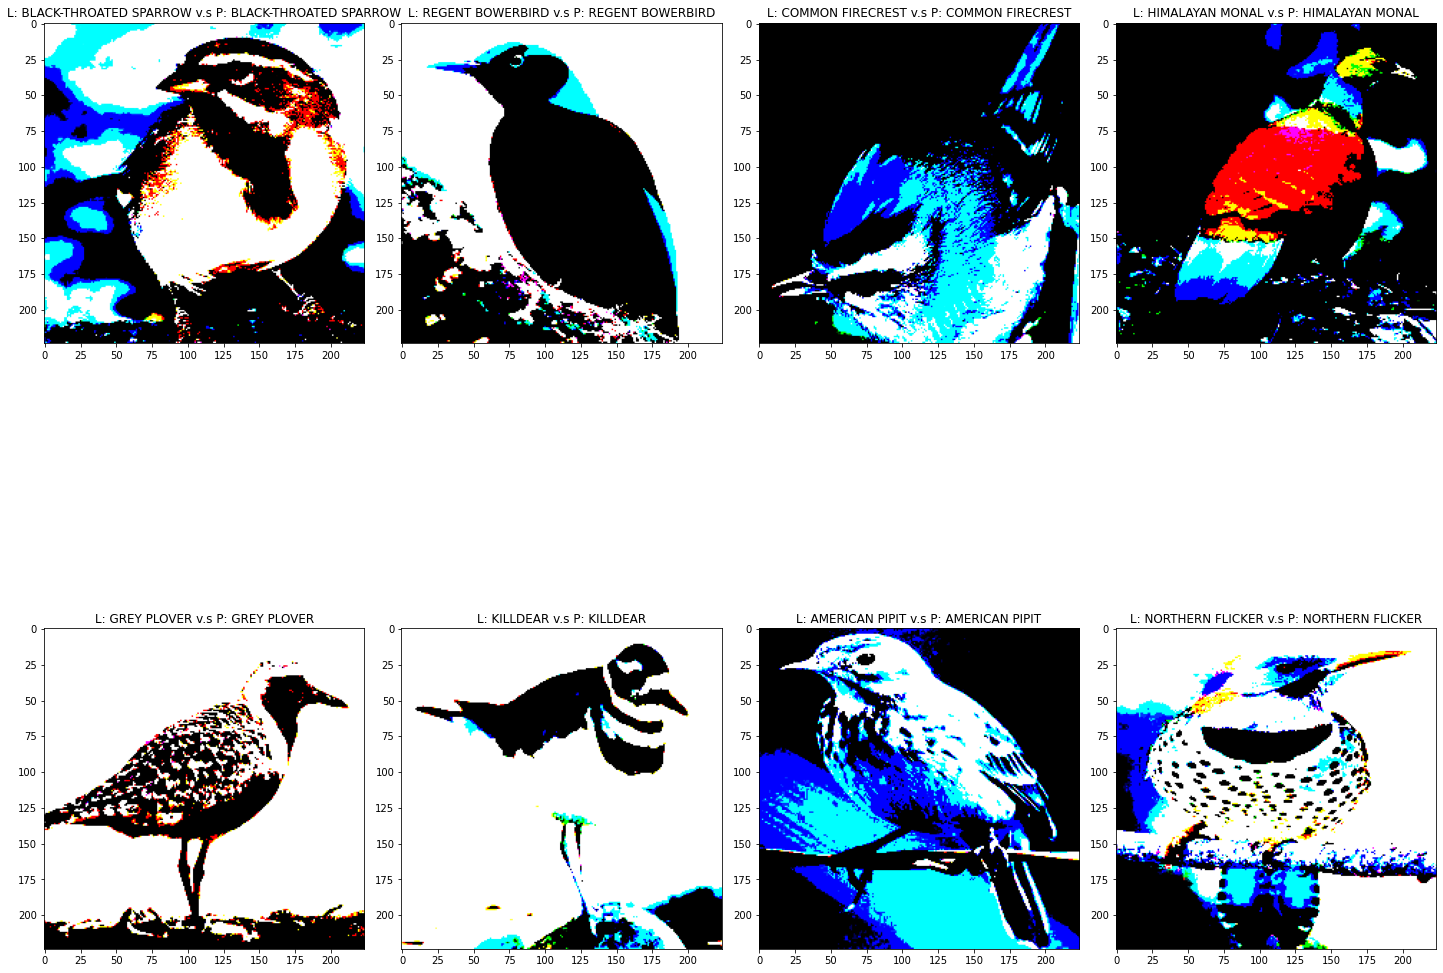

In [ ]:
ref = list(train_image.class_indices.keys())

print(ref)

images, labels = test_image.next()


preds = vgg_model.predict(images, batch_size = 8)
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,20))
dic={i:ax for i,ax in enumerate(axes.flat)}
for i in range(0,8):
    label = np.argmax(labels[i])
    pred = np.argmax(preds[i])
    image = images[i]
    dic[i].set_title("L: " + ref[label] + " v.s " + "P: " + ref[pred])
    dic[i].imshow(image)
plt.tight_layout()    
plt.show() 